Importações

In [9]:
import pandas as pd
from PIL import Image, ImageOps
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import moments_hu
from skimage.color import rgb2hsv

Diretorios e tratamentos das planilias 

In [10]:
# Caminho para o diretório de imagens e para o arquivo CSV
image_dir = 'F:/6º Periodo/PAI/Trabalho-de-PAI/dataset'
csv_path = "F:/6º Periodo/PAI/Trabalho-de-PAI/csv's/classifications.csv"

In [11]:
df = pd.read_csv(csv_path)
df

,image_id,image_filename,image_doi,cell_id,bethesda_system,nucleus_x,nucleus_y
0,400,9ae8a4edde40219bad6303cebc672ee4.png,10.6084/m9.figshare.12230906,1,SCC,792,462
1,400,9ae8a4edde40219bad6303cebc672ee4.png,10.6084/m9.figshare.12230906,2,SCC,601,678
2,400,9ae8a4edde40219bad6303cebc672ee4.png,10.6084/m9.figshare.12230906,3,SCC,363,467
3,400,9ae8a4edde40219bad6303cebc672ee4.png,10.6084/m9.figshare.12230906,4,SCC,599,437
4,400,9ae8a4edde40219bad6303cebc672ee4.png,10.6084/m9.figshare.12230906,5,Negative for intraepithelial lesion,1186,450
...,...,...,...,...,...,...,...
11529,1,be340ee72689dfe3f8dc9c24de6127f4.png,10.6084/m9.figshare.12229511,11530,LSIL,618,407
11530,1,be340ee72689dfe3f8dc9c24de6127f4.png,10.6084/m9.figshare.12229511,11531,LSIL,607,374
11531,1,be340ee72689dfe3f8dc9c24de6127f4.png,10.6084/m9.figshare.12229511,11532,LSIL,707,251
11532,1,be340ee72689dfe3f8dc9c24de6127f4.png,10.6084/m9.figshare.12229511,11533,LSIL,579,246


In [12]:
df_filtrado = df[df['image_filename'].isin(os.listdir('F:/6º Periodo/PAI/Trabalho-de-PAI/dataset'))]
df_filtrado.to_csv("F:/6º Periodo/PAI/Trabalho-de-PAI/csv's/filtered_file.csv", index=False)
df_filtrado

,image_id,image_filename,image_doi,cell_id,bethesda_system,nucleus_x,nucleus_y
526,393,363b6b00d925e5c52694b8f7b678c53b.png,10.6084/m9.figshare.12230885,527,LSIL,998,890
527,393,363b6b00d925e5c52694b8f7b678c53b.png,10.6084/m9.figshare.12230885,528,LSIL,645,600
528,393,363b6b00d925e5c52694b8f7b678c53b.png,10.6084/m9.figshare.12230885,529,LSIL,609,585
529,393,363b6b00d925e5c52694b8f7b678c53b.png,10.6084/m9.figshare.12230885,530,Negative for intraepithelial lesion,393,140
530,393,363b6b00d925e5c52694b8f7b678c53b.png,10.6084/m9.figshare.12230885,531,Negative for intraepithelial lesion,348,207
...,...,...,...,...,...,...,...
11487,2,9d0f43b29d78f673e9caf77928b4af3c.png,10.6084/m9.figshare.12229520,11488,ASC-US,671,244
11488,2,9d0f43b29d78f673e9caf77928b4af3c.png,10.6084/m9.figshare.12229520,11489,ASC-US,602,274
11489,2,9d0f43b29d78f673e9caf77928b4af3c.png,10.6084/m9.figshare.12229520,11490,ASC-US,605,252
11490,2,9d0f43b29d78f673e9caf77928b4af3c.png,10.6084/m9.figshare.12229520,11491,ASC-US,550,319


Recortando as Imagens e Salvando nas pastas

In [13]:
def crop_subimage_with_padding(image, x, y, size=100):
    half_size = size // 2

    # Coordenadas para o corte
    left = x - half_size
    upper = y - half_size
    right = x + half_size
    lower = y + half_size

    # Verificar se as coordenadas estão fora dos limites da imagem e ajustar com padding
    padding_left = max(0, -left)
    padding_top = max(0, -upper)
    padding_right = max(0, right - image.width)
    padding_bottom = max(0, lower - image.height)

    # Ajustar coordenadas de corte para estarem dentro dos limites da imagem
    left = max(0, left)
    upper = max(0, upper)
    right = min(image.width, right)
    lower = min(image.height, lower)

    # Recortar a imagem
    cropped_image = image.crop((left, upper, right, lower))

    # Adicionar padding se necessário
    if padding_left > 0 or padding_top > 0 or padding_right > 0 or padding_bottom > 0:
        cropped_image = ImageOps.expand(cropped_image, border=(padding_left, padding_top, padding_right, padding_bottom), fill=0)

    # Garantir que a subimagem tenha exatamente 100x100 pixels
    cropped_image = cropped_image.resize((size, size))
    
    return cropped_image

In [14]:
# Diretório para salvar as subimagens
subimage_dir = 'F:/6º Periodo/PAI/Trabalho-de-PAI/recortes/'
os.makedirs(subimage_dir, exist_ok=True)

In [8]:
atributos_classe_cell = df_filtrado['bethesda_system'].unique()
print(atributos_classe_cell)
for atributo in atributos_classe_cell:
    x = f'F:/6º Periodo/PAI/Trabalho-de-PAI/sub-imagens/{atributo}'
    os.makedirs(x, exist_ok=True)

['LSIL' 'Negative for intraepithelial lesion' 'ASC-H' 'ASC-US' 'SCC'
 'HSIL']


In [15]:
for index, row in df_filtrado.iterrows():
    try:
        filename = row['image_filename']
        x, y = int(row['nucleus_x']), int(row['nucleus_y'])
        classe_celula = row['bethesda_system']
        
        # Caminho completo para a imagem
        image_path = os.path.join(image_dir, filename)
        
        # Carregar a imagem
        image = Image.open(image_path).convert('RGB')
        # Recortar a subimagem
        subimage = crop_subimage_with_padding(image, x, y)
        
        # Salvar a subimagem
        subimage_filename = f"{row['cell_id']}.png"
        subimage_path = os.path.join(subimage_dir,subimage_filename)
        subimage.save(subimage_path)

        # print(f'Subimagem salva em {subimage_path}')
    except:
        pass
    

Histograms

In [9]:
def reduce_grayscale_depth(image, levels=16):
    """ Reduz a profundidade de tons de cinza para o número especificado de níveis. """
    factor = 256 // levels
    reduced_image = image // factor
    return reduced_image

In [10]:
def plot_histogram(image, levels=16):
    """ Gera e plota o histograma da imagem com a profundidade reduzida de tons de cinza. """
    # Reduzir a profundidade dos tons de cinza
    reduced_image = reduce_grayscale_depth(np.array(image), levels)
    
    # Calcular o histograma
    histogram, bin_edges = np.histogram(reduced_image, bins=levels, range=(0, levels))

    # Plotar o histograma
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], histogram, width=0.8, color='gray')
    plt.xlabel('Nível de Cinza')
    plt.ylabel('Frequência')
    plt.title('Histograma de Tons de Cinza com 16 Níveis')
    plt.xticks(bin_edges[:-1])
    plt.show()

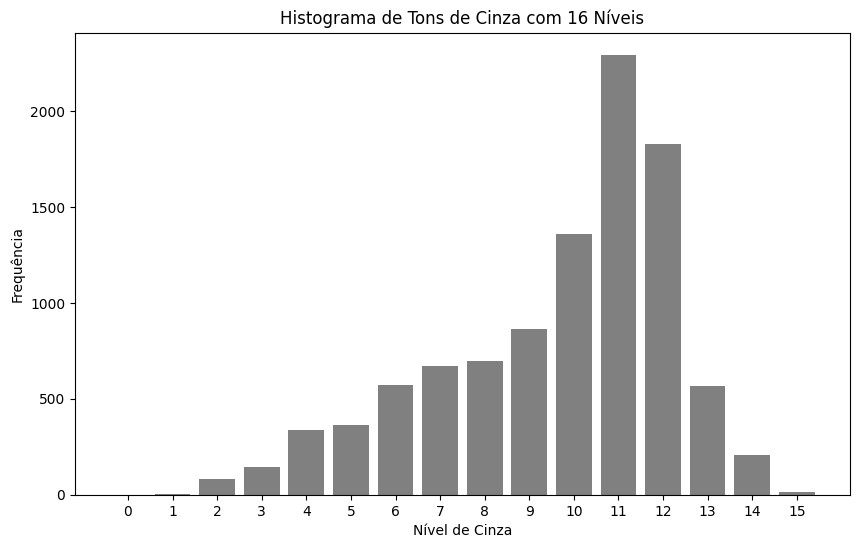

In [11]:
# Caminho da subimagem para análise
subimage_path = 'F:/6º Periodo/PAI/Trabalho-de-PAI/sub-imagens/ASC-H/8140.png'

# Carregar a subimagem
subimage = Image.open(subimage_path).convert('L')

# Gerar e plotar o histograma
plot_histogram(subimage, levels=16)

Implemente a funcionalidade de geração dos histogramas de cor da imagem com quantização de
16 valores para o canal H e 8 valores para o V (histograma 2D com 16*8 entradas).

In [12]:
def quantize_channel(channel, levels):
    """ Quantiza o canal de uma imagem para o número especificado de níveis. """
    factor = 256 // levels
    quantized_channel = channel // factor
    return quantized_channel

In [14]:
def plot_histogram_2d(image_path, h_levels=16, v_levels=8):
    """ Gera e plota o histograma 2D para os canais H e V com quantização especificada. """
    # Carregar a imagem
    subimage = Image.open(image_path).convert('RGB')
    
    # Converter a imagem para o espaço de cores HSV
    hsv_image = subimage.convert('HSV')
    hsv_array = np.array(hsv_image)
    
    # Separar os canais H, S e V
    h_channel, s_channel, v_channel = hsv_array[:,:,0], hsv_array[:,:,1], hsv_array[:,:,2]
    
    # Quantizar os canais H e V
    h_quantized = quantize_channel(h_channel, h_levels)
    v_quantized = quantize_channel(v_channel, v_levels)
    
    # Calcular o histograma 2D
    histogram, x_edges, y_edges = np.histogram2d(h_quantized.flatten(), v_quantized.flatten(), bins=[h_levels, v_levels], range=[[0, h_levels], [0, v_levels]])

    # Plotar o histograma 2D
    plt.figure(figsize=(10, 6))
    plt.imshow(histogram.T, origin='lower', cmap='gray', aspect='auto')
    plt.colorbar()
    plt.xlabel('Quantização do Canal H (Hue)')
    plt.ylabel('Quantização do Canal V (Value)')
    plt.title('Histograma 2D Quantizado para Canais H e V')
    plt.xticks(np.arange(h_levels), labels=np.arange(h_levels))
    plt.yticks(np.arange(v_levels), labels=np.arange(v_levels))
    plt.show()

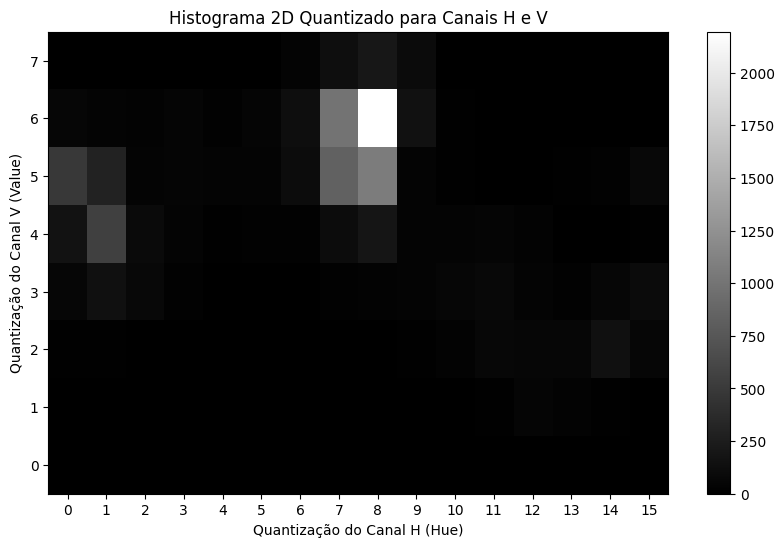

In [15]:
# Caminho da subimagem para análise
subimage_path = 'F:/6º Periodo/PAI/Trabalho-de-PAI/sub-imagens/ASC-H/8140.png'

# Gerar e plotar o histograma 2D
plot_histogram_2d(subimage_path, h_levels=16, v_levels=8)

Calcular as matrizes de co-ocorrência Ci,i onde i=1,2,4,8,16 e 32, considerando 16 tons de cinza

In [16]:
def calculate_cooccurrence_matrices(image, levels=16, distances=[1, 2, 4, 8, 16, 32]):
    """ Calcula as matrizes de co-ocorrência para diferentes distâncias. """
    # Reduzir a profundidade dos tons de cinza
    reduced_image = reduce_grayscale_depth(np.array(image), levels)
    
    # Calcular matrizes de co-ocorrência
    cooccurrence_matrices = {}
    for distance in distances:
        matrix = graycomatrix(reduced_image, [distance], [0], levels=levels, symmetric=True, normed=True)
        cooccurrence_matrices[distance] = matrix
    return cooccurrence_matrices

In [17]:
def plot_cooccurrence_matrices(cooccurrence_matrices):
    """ Exibe as matrizes de co-ocorrência calculadas. """
    num_matrices = len(cooccurrence_matrices)
    fig, axes = plt.subplots(1, num_matrices, figsize=(20, 5))
    
    for ax, (distance, matrix) in zip(axes, cooccurrence_matrices.items()):
        ax.imshow(matrix[:, :, 0, 0], cmap='gray', interpolation='nearest')
        ax.set_title(f'Distância = {distance}')
        ax.set_xlabel('Níveis de Cinza')
        ax.set_ylabel('Níveis de Cinza')
    
    plt.tight_layout()
    plt.show()

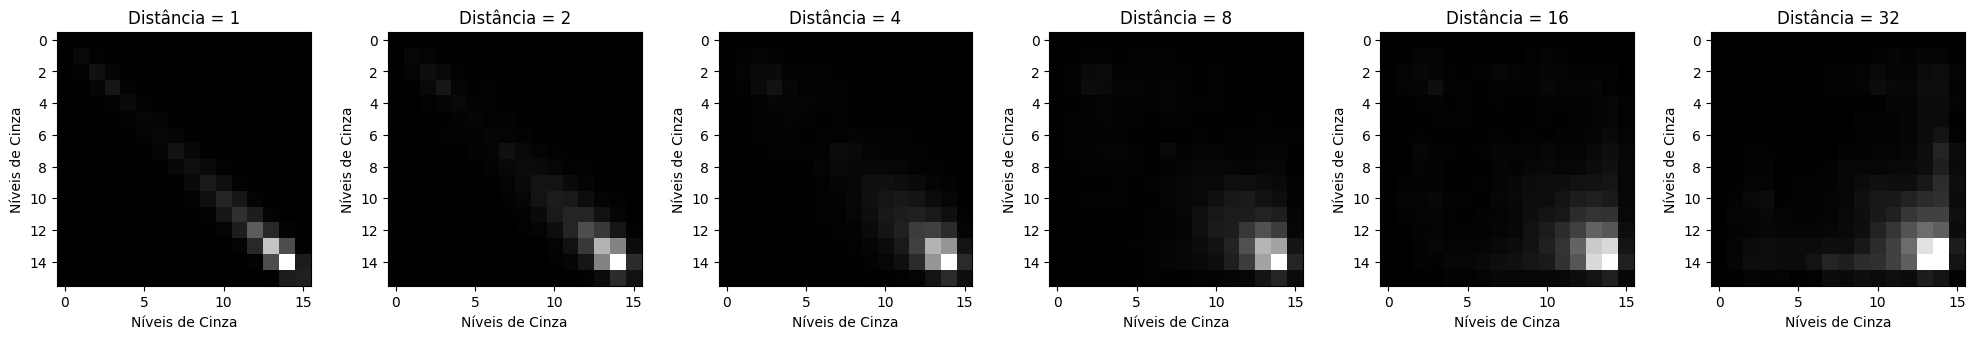

In [18]:
# Caminho da subimagem para análise
subimage_path = 'F:/6º Periodo/PAI/Trabalho-de-PAI/sub-imagens/HSIL/7604.png'

# Carregar a subimagem
subimage = Image.open(subimage_path).convert('L')

# Calcular as matrizes de co-ocorrência
distances = [1, 2, 4, 8, 16, 32]
cooccurrence_matrices = calculate_cooccurrence_matrices(subimage, levels=16, distances=distances)

# Exibir as matrizes de co-ocorrência
plot_cooccurrence_matrices(cooccurrence_matrices)

Calcular os descritores de Haralick Entropia, Homogeneidade e Contraste para as matrizes de co-
ocorrência do item anterior (3*6 características

In [19]:
def calculate_entropy(matrix):
    """ Calcula a entropia a partir da matriz de co-ocorrência normalizada. """
    # Evitar log de zero
    non_zero = matrix[matrix > 0]
    entropy = -np.sum(non_zero * np.log2(non_zero))
    return entropy

In [20]:
def calculate_haralick_descriptors(cooccurrence_matrices):
    """ Calcula os descritores de Haralick para as matrizes de co-ocorrência fornecidas. """
    properties = ['contrast', 'homogeneity']
    descriptors = {prop: [] for prop in properties}
    descriptors['entropy'] = []
    
    for distance, matrix in cooccurrence_matrices.items():
        for prop in properties:
            value = graycoprops(matrix, prop)[0, 0]
            descriptors[prop].append(value)
        entropy = calculate_entropy(matrix[:, :, 0, 0])
        descriptors['entropy'].append(entropy)
    
    return descriptors

In [21]:
# Calcular os descritores de Haralick
haralick_descriptors = calculate_haralick_descriptors(cooccurrence_matrices)

# Exibir os descritores
for prop, values in haralick_descriptors.items():
    print(f"{prop.capitalize()}:")
    for distance, value in zip(distances, values):
        print(f"  Distância {distance}: {value:.4f}")

Contrast:
  Distância 1: 0.6881
  Distância 2: 1.8740
  Distância 4: 4.1623
  Distância 8: 7.6476
  Distância 16: 12.5167
  Distância 32: 19.4679
Homogeneity:
  Distância 1: 0.7675
  Distância 2: 0.6400
  Distância 4: 0.5514
  Distância 8: 0.4771
  Distância 16: 0.4119
  Distância 32: 0.3605
Entropy:
  Distância 1: 4.7567
  Distância 2: 5.3247
  Distância 4: 5.7110
  Distância 8: 5.9921
  Distância 16: 6.1771
  Distância 32: 6.1733


Calcular os momentos invariantes de Hu para a imagem em 256 tons de cinza e para os 3 canais
originais do modelo HSV (4*7 características)

In [23]:
def calculate_hu_moments(image):
    """ Calcula os momentos invariantes de Hu para uma imagem. """
    moments = moments_hu(image)
    return moments

In [24]:
subimage_256 = Image.open(subimage_path).convert('L')
subimage_256_np = np.array(subimage_256)
hu_moments_grayscale = calculate_hu_moments(subimage_256_np)

# Calcular momentos de Hu para os canais HSV
subimage_rgb = Image.open(subimage_path).convert('RGB')
subimage_hsv = rgb2hsv(np.array(subimage_rgb))
hu_moments_h = calculate_hu_moments(subimage_hsv[:, :, 0])
hu_moments_s = calculate_hu_moments(subimage_hsv[:, :, 1])
hu_moments_v = calculate_hu_moments(subimage_hsv[:, :, 2])

# Exibir os momentos de Hu
print("Momentos de Hu para a imagem em 256 tons de cinza:")
for i, moment in enumerate(hu_moments_grayscale, start=1):
    print(f"  Hu[{i}]: {moment:.4e}")

print("Momentos de Hu para o canal H do modelo HSV:")
for i, moment in enumerate(hu_moments_h, start=1):
    print(f"  Hu[{i}]: {moment:.4e}")

print("Momentos de Hu para o canal S do modelo HSV:")
for i, moment in enumerate(hu_moments_s, start=1):
    print(f"  Hu[{i}]: {moment:.4e}")

print("Momentos de Hu para o canal V do modelo HSV:")
for i, moment in enumerate(hu_moments_v, start=1):
    print(f"  Hu[{i}]: {moment:.4e}")

Momentos de Hu para a imagem em 256 tons de cinza:
  Hu[1]: 8.8000e+01
  Hu[2]: 7.7800e+03
  Hu[3]: 1.4312e+04
  Hu[4]: 1.6200e+04
  Hu[5]: 2.4494e+08
  Hu[6]: 1.4256e+06
  Hu[7]: 2.9160e+07
Momentos de Hu para o canal H do modelo HSV:
  Hu[1]: 1.2050e+00
  Hu[2]: 1.4375e+00
  Hu[3]: 2.9094e+00
  Hu[4]: 2.9089e+00
  Hu[5]: 8.4609e+00
  Hu[6]: 3.4875e+00
  Hu[7]: -1.5027e-01
Momentos de Hu para o canal S do modelo HSV:
  Hu[1]: 1.4789e+00
  Hu[2]: 2.1877e+00
  Hu[3]: 4.7321e+00
  Hu[4]: 4.3850e+00
  Hu[5]: 1.9969e+01
  Hu[6]: 6.4844e+00
  Hu[7]: -4.9582e-01
Momentos de Hu para o canal V do modelo HSV:
  Hu[1]: 6.7451e-01
  Hu[2]: 4.3429e-01
  Hu[3]: 9.0527e-01
  Hu[4]: 9.5817e-01
  Hu[5]: 8.9224e-01
  Hu[6]: 6.3134e-01
  Hu[7]: 1.5825e-02
